In [1]:
#  Use Pandas to clean and format your data set(s)

#  Create a Jupyter Notebook describing the data exploration and cleanup process

#  Create a Jupyter Notebook illustrating the final data analysis

#  Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data)

#  Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation

#  Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions

#  Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.

In [2]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
# read data as csv
file = '../DISNEY-DONUT-PROJECT/Resources/bushfire_data.csv'
bushfire_df = pd.read_csv(file)
bushfire_df

,year,description,state,area burned ha,area burned acres,fatalities,homes destroyed,other buildings destroyed,cattle sheep,livestock,approx value loss
0,1851,Black Thursday bushfires,Victoria,5000000.0,12000000.0,12.0,0.0,0.0,1000000.0,2000.0,NaN
1,1895,Upper Blue Mountains fires,New South Wales,150.0,370.0,0.0,12.0,1.0,NaN,NaN,NaN
2,1898,Red Tuesday bushfires,Victoria,260000.0,640000.0,12.0,0.0,2000.0,NaN,NaN,NaN
3,1926,1926 bushfires,Victoria,390000.0,960000.0,60.0,1000.0,0.0,NaN,NaN,NaN
4,1939,Black Friday bushfires,Victoria,2000000.0,4900000.0,71.0,3700.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
79,2015,2015 Pinery bushfire,South Australia,85000.0,210000.0,2.0,91.0,0.0,NaN,NaN,NaN
80,2016,2016 Murray Road bushfire (Waroona and Harvey),Western Australia,69165.0,170910.0,2.0,181.0,NaN,NaN,NaN,NaN
81,2017,2017 New South Wales bushfires,New South Wales,52000.0,130000.0,0.0,35.0,0.0,NaN,NaN,NaN
82,2019,Tingha bushfire,New South Wales,23419.0,57870.0,0.0,19.0,57.0,NaN,NaN,NaN


In [4]:
# check data that has number is a 'float', i.e. every variable except 'year', 'description' and 'state' should be a float
bushfire_df.dtypes

year                           int64
description                   object
state                         object
area burned ha               float64
area burned acres            float64
fatalities                   float64
homes destroyed              float64
other buildings destroyed    float64
cattle sheep                 float64
livestock                    float64
approx value loss             object
dtype: object

In [5]:
# check why variables are not a float 

# approx_value_loss
bushfire_df['approx value loss'].unique()

# a check of approx value loss suggests there is a data point that was included with a '£' 
# will leave for now because the value loss is reflected as the dollar value for that year and needs to be escalated by CPI to (at least) 2020 for analysis 

array([nan, '£1,000,000', '14000000', '3000000', '9000000', '13000000',
       '176000000', '25000000', '12000000', '59100000', '59000000',
       '29000000', '69000000', '350000000', '27700000', '22400000',
       '1070000000', '35000000', '53000000', '87100000', '183400000',
       '15000000', '2300000000'], dtype=object)

In [6]:
# check timeseries 

bushfire_df.groupby('state').count()['year'].sort_values()

state
Australian Capital Territory     1
Nationwide                       1
Queensland                       2
Tasmania                         3
Northern Territory               4
South Australia                  9
Western Australia               18
Victoria                        19
New South Wales                 27
Name: year, dtype: int64

In [7]:
# proxy for the severity of bushfire is 'area burned ha'
# check na's in these two variables 

bushfire_df['area burned ha'].isnull().sum()

8

In [8]:
# create dataframe that does not have any nulls for 'area burned ha'

area_burnt_df = bushfire_df.dropna(subset = ['area burned ha'])
area_burnt_df.isnull().sum()

year                          0
description                   0
state                         0
area burned ha                0
area burned acres            13
fatalities                    8
homes destroyed               6
other buildings destroyed    10
cattle sheep                 73
livestock                    68
approx value loss            52
dtype: int64

In [9]:
area_burnt_df

,year,description,state,area burned ha,area burned acres,fatalities,homes destroyed,other buildings destroyed,cattle sheep,livestock,approx value loss
0,1851,Black Thursday bushfires,Victoria,5000000.0,12000000.0,12.0,0.0,0.0,1000000.0,2000.0,NaN
1,1895,Upper Blue Mountains fires,New South Wales,150.0,370.0,0.0,12.0,1.0,NaN,NaN,NaN
2,1898,Red Tuesday bushfires,Victoria,260000.0,640000.0,12.0,0.0,2000.0,NaN,NaN,NaN
3,1926,1926 bushfires,Victoria,390000.0,960000.0,60.0,1000.0,0.0,NaN,NaN,NaN
4,1939,Black Friday bushfires,Victoria,2000000.0,4900000.0,71.0,3700.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
79,2015,2015 Pinery bushfire,South Australia,85000.0,210000.0,2.0,91.0,0.0,NaN,NaN,NaN
80,2016,2016 Murray Road bushfire (Waroona and Harvey),Western Australia,69165.0,170910.0,2.0,181.0,NaN,NaN,NaN,NaN
81,2017,2017 New South Wales bushfires,New South Wales,52000.0,130000.0,0.0,35.0,0.0,NaN,NaN,NaN
82,2019,Tingha bushfire,New South Wales,23419.0,57870.0,0.0,19.0,57.0,NaN,NaN,NaN


In [19]:
fires_df = area_burnt_df.groupby('year').sum()
fires_df

,area burned ha,area burned acres,fatalities,homes destroyed,other buildings destroyed,cattle sheep,livestock
year,,,,,,,
1851,5000000.0,12000000.0,12.0,0.0,0.0,1000000.0,2000.0
1895,150.0,370.0,0.0,12.0,1.0,0.0,0.0
1898,260000.0,640000.0,12.0,0.0,2000.0,0.0,0.0
1926,390000.0,960000.0,60.0,1000.0,0.0,0.0,0.0
1939,2000000.0,4900000.0,71.0,3700.0,0.0,0.0,0.0
1944,1000000.0,2500000.0,20.0,500.0,0.0,0.0,0.0
1952,4000000.0,9900000.0,11.0,0.0,0.0,0.0,0.0
1955,160000.0,395000.0,2.0,40.0,0.0,0.0,0.0
1957,2000000.0,0.0,4.0,158.0,12.0,0.0,0.0


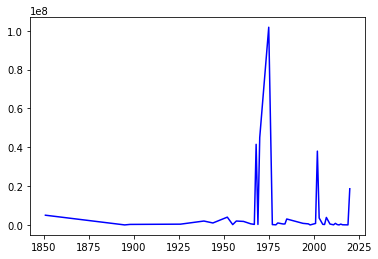

In [17]:
# Set x axis and tick locations

total_burnt = fires_df['area burned ha']
plt.plot(total_burnt, color="blue")
plt.show()

# plt.xlabel("Time")
# plt.ylabel("Area burned (ha)")
# plt.title("Area burned overtiem")
# plt.xlim(0,50)


In [21]:
# create dataframe that does not have any nulls for 'approx value loss'

value_loss_df = bushfire_df.dropna(subset =  ['area burned ha', 'approx value loss'])
value_loss_df.isnull().sum()

year                          0
description                   0
state                         0
area burned ha                0
area burned acres             8
fatalities                    4
homes destroyed               1
other buildings destroyed     3
cattle sheep                 23
livestock                    21
approx value loss             0
dtype: int64

In [22]:
value_loss_df

,year,description,state,area burned ha,area burned acres,fatalities,homes destroyed,other buildings destroyed,cattle sheep,livestock,approx value loss
9,1957,"1957 Grose Valley bushfire, Blue Mountains",New South Wales,2000000.0,NaN,4.0,158.0,12.0,NaN,NaN,"£1,000,000"
15,1967,Black Tuesday bushfires,Tasmania,264000.0,650000.0,62.0,1293.0,0.0,NaN,NaN,14000000
17,1968,1968 Blue Mountains Bushfire,New South Wales,1500000.0,NaN,14.0,150.0,5.0,NaN,NaN,3000000
25,1977,Western Districts bushfires,Victoria,103000.0,250000.0,4.0,116.0,340.0,NaN,NaN,9000000
30,1980,Mt Lofty Ranges,South Australia,8000.0,NaN,NaN,51.0,1.0,NaN,NaN,13000000
31,1983,Grays Point bushfire,New South Wales,60000.0,NaN,3.0,0.0,0.0,NaN,NaN,3000000
32,1983,Ash Wednesday bushfires,South Australia,418000.0,1030000.0,75.0,2400.0,0.0,NaN,19300.0,176000000
35,1985,1984 - 85 New South Wales bushfires,New South Wales,2484000.0,6120000.0,5.0,0.0,0.0,NaN,40000.0,25000000
38,1994,Beerburrum State Forest and urban fires along ...,Queensland,5000.0,NaN,NaN,23.0,NaN,NaN,NaN,59100000
39,1994,1994 Eastern seaboard fires,New South Wales,800000.0,990000.0,4.0,225.0,0.0,NaN,NaN,59000000


In [23]:
sum_loss = value_loss_df.groupby('year').sum()

In [ ]:
# need to escalate value loss with CPI to make it comparable